<a href="https://colab.research.google.com/github/Rohan20202/Cardiovascular-Risk-Prediction-Project/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cardiovascular Risk Prediction Project**

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,
Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of
future coronary heart disease (CHD). The dataset provides the patients’ information. It includes
over 4,000 records and 15 attributes.**

**Variables**

**Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk
factors.**

**Data Description :**

• Sex: male or female("M" or "F")

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to
whole numbers, the concept of age is continuous)
Behavioral

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.) Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)
Medical(current)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

•Predict variable (desired target)
10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) -
Dv 

**Connecting the drive**

In [28]:
#mounting the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Importing Libraries**

In [29]:
#loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as mno

**Loading the dataset**

In [30]:
#loading the given dataset
data = pd.read_csv('/content/drive/MyDrive/Caridovascular Risk prediction/data_cardiovascular_risk.csv')

In [31]:
#first 5 rows of data
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [32]:
#shape and of the dataset
data.shape

(3390, 17)

In [33]:
#all the columns in the dataset
data.columns


Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [34]:
#the number of unique values that each column contains
data.nunique()

id                 3390
age                  39
education             4
sex                   2
is_smoking            2
cigsPerDay           32
BPMeds                2
prevalentStroke       2
prevalentHyp          2
diabetes              2
totChol             240
sysBP               226
diaBP               142
BMI                1259
heartRate            68
glucose             132
TenYearCHD            2
dtype: int64

In [35]:
data.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [36]:
#showing the datatype of all features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

**Data Cleaning**

**Checking for null values**

In [37]:
pd.DataFrame(data.isna().sum(),columns=['records missings']).T

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
records missings,0,0,87,0,0,22,44,0,0,0,38,0,0,14,1,304,0


In [38]:
data.dropna(axis = 0, inplace = True) 
print(data.shape)

(2927, 17)


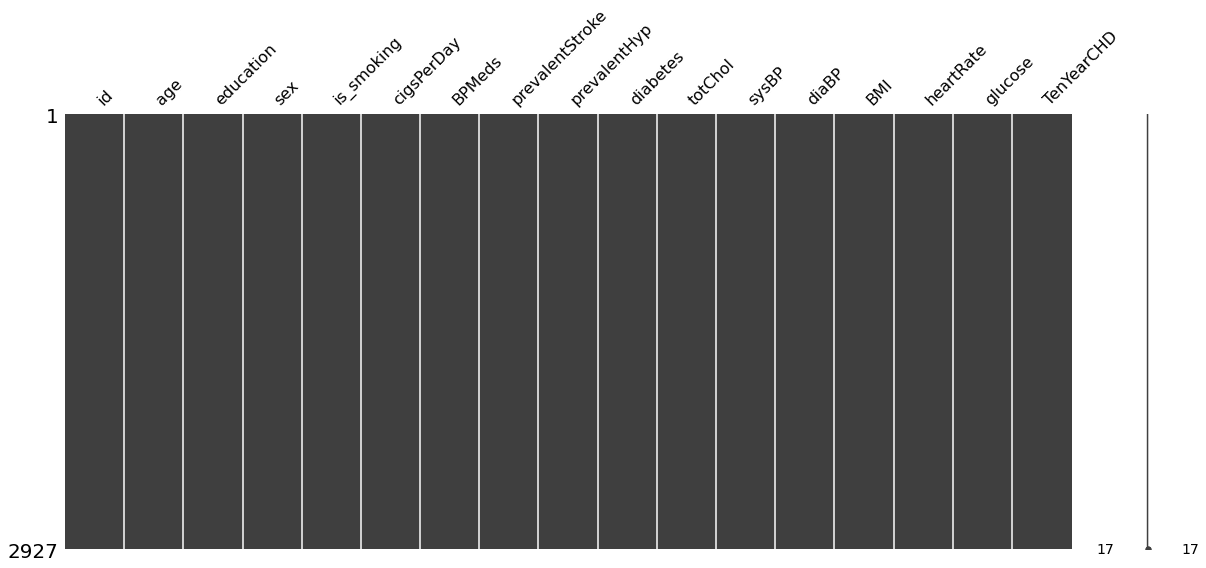

In [39]:
#checking for nan values
mno.matrix(data,figsize=(20,8))

**Data Visualization**

**Seprate dependent and independent variables**

In [40]:
dependent_variable = 'TenYearCHD'

In [41]:
independent_variables = list(set(data.columns.tolist()) - {dependent_variable})
independent_variables

['BMI',
 'totChol',
 'education',
 'prevalentStroke',
 'diaBP',
 'heartRate',
 'prevalentHyp',
 'glucose',
 'sex',
 'diabetes',
 'sysBP',
 'cigsPerDay',
 'is_smoking',
 'age',
 'BPMeds',
 'id']

In [42]:
col_basic_info = [ 'id', 'age', 'education', 'sex']

col_habbits = ['is_smoking', 'cigsPerDay']

col_medical_history = ['BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']

col_target = ['TenYearCHD']

In [43]:
independent_vars = data[col_basic_info  +col_habbits + col_medical_history]
dependent_vars = data[col_target]

In [44]:
independent_vars.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000,2927.000000
mean,1692.869833,49.507345,1.965494,9.112743,0.030065,0.006150,0.314315,0.026990,237.129142,132.626409,82.906218,25.797041,75.888282,81.934404
std,986.025198,8.597191,1.017199,11.882784,0.170795,0.078192,0.464322,0.162082,44.613282,22.326197,12.078873,4.130376,11.971207,24.106943
min,1.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,113.000000,83.500000,48.000000,15.960000,45.000000,40.000000
25%,836.500000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,74.500000,23.030000,68.000000,71.000000
50%,1689.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.500000,82.000000,25.380000,75.000000,78.000000
75%,2547.500000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.000000,90.000000,28.040000,83.000000,87.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,600.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [45]:
dependent_vars.describe()

,TenYearCHD
count,2927.000000
mean,0.151691
std,0.358783
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


**Hitogram for all the features to understand the distribution**

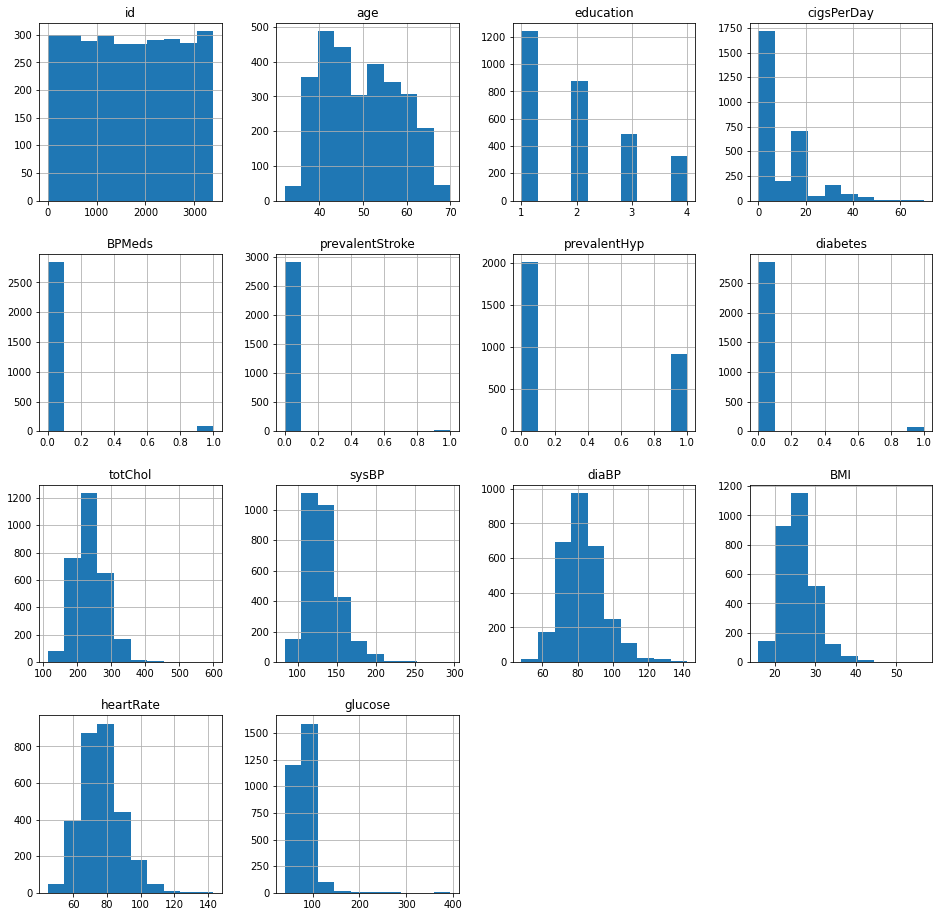

In [46]:
independent_vars.hist(figsize= (16,16))
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe1d49be0d0>]],
      dtype=object)

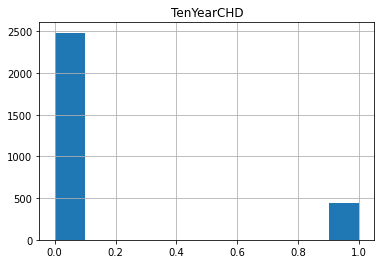

In [47]:
dependent_vars.hist()

**Checking for Outliers**

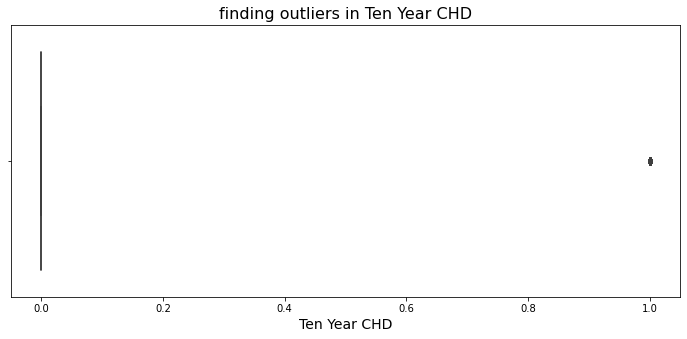

In [48]:
#checking for outliers
plt.figure(figsize=(12,5))
sns.boxplot(data=data, x='TenYearCHD', whis=50)
plt.title('finding outliers in Ten Year CHD', size=16)
plt.xlabel('Ten Year CHD', size=14)
plt.show()

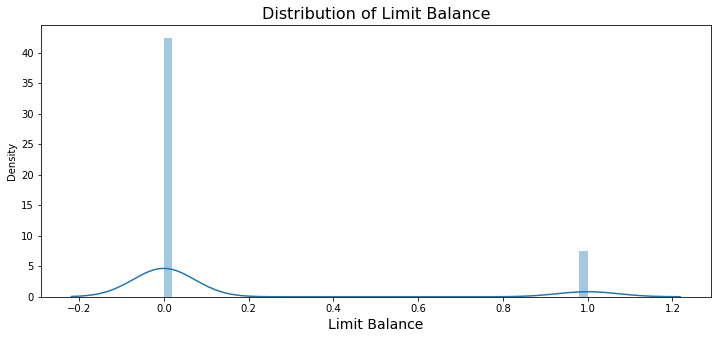

In [49]:
#plotting the desity of the linit balance feature
plt.figure(figsize=(12,5))
sns.distplot(data['TenYearCHD'])
plt.title('Distribution of Limit Balance', size=16)
plt.xlabel('Limit Balance', size=14)
plt.show()